# Analiza i Bazy Danych
## Karol Musiał, grupa 3a
### Laboratorium 2
## "TIER Protocol i Tidy Data"

In [25]:
# Importowanie
from matplotlib import pyplot as plt
import pandas as pd

# Wczytywanie danych
data = pd.read_csv('../Original Data/originaldata.csv')

In [26]:
# Wyświetlanie surowych danych
DF = pd.DataFrame(data)
DF

,iso2,year,new_sp,new_sp_m04,new_sp_m514,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,...,new_sp_f04,new_sp_f514,new_sp_f014,new_sp_f1524,new_sp_f2534,new_sp_f3544,new_sp_f4554,new_sp_f5564,new_sp_f65,new_sp_fu
0,AD,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AD,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AD,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AD,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AD,1993,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5764,ZW,2004,14581.0,NaN,NaN,187.0,833.0,2908.0,2298.0,1056.0,...,NaN,NaN,225.0,1140.0,2858.0,1565.0,622.0,214.0,111.0,NaN
5765,ZW,2005,13155.0,NaN,NaN,210.0,837.0,2264.0,1855.0,762.0,...,NaN,NaN,269.0,1136.0,2242.0,1255.0,578.0,193.0,603.0,NaN
5766,ZW,2006,12718.0,NaN,NaN,215.0,736.0,2391.0,1939.0,896.0,...,NaN,NaN,237.0,1020.0,2424.0,1355.0,632.0,230.0,96.0,NaN
5767,ZW,2007,10583.0,6.0,132.0,138.0,500.0,3693.0,0.0,716.0,...,7.0,178.0,185.0,739.0,3311.0,0.0,553.0,213.0,90.0,NaN


In [27]:
# Meltowanie (zamiana kolumn na wiersze)
New_DF = pd.melt(DF, id_vars=['iso2', 'year'], value_vars=['new_sp_m04', 'new_sp_m514', 'new_sp_m014', 'new_sp_m1524', 'new_sp_m2534', 'new_sp_m3544', 'new_sp_m4554', 'new_sp_m5564', 'new_sp_m65', 'new_sp_mu', 'new_sp_f04', 'new_sp_f514', 'new_sp_f014', 'new_sp_f1524', 'new_sp_f2534', 'new_sp_f3544', 'new_sp_f4554', 'new_sp_f5564', 'new_sp_f65', 'new_sp_fu'], var_name="Mixed", value_name="Cases")
New_DF

,iso2,year,Mixed,Cases
0,AD,1989,new_sp_m04,NaN
1,AD,1990,new_sp_m04,NaN
2,AD,1991,new_sp_m04,NaN
3,AD,1992,new_sp_m04,NaN
4,AD,1993,new_sp_m04,NaN
...,...,...,...,...
115375,ZW,2004,new_sp_fu,NaN
115376,ZW,2005,new_sp_fu,NaN
115377,ZW,2006,new_sp_fu,NaN
115378,ZW,2007,new_sp_fu,NaN


In [28]:
# Rozdzielanie kolumny Mixed
New_DF[['A1', 'A2', 'A3']] = New_DF['Mixed'].str.split('_', 2, expand=True)
New_DF[['A4', 'A5']] = New_DF['A3'].str.split('m|f', 1, expand=True)
New_DF[['A6', 'A7']] = New_DF['A3'].str.split('[\d|u]', 1, expand=True)
New_DF

,iso2,year,Mixed,Cases,A1,A2,A3,A4,A5,A6,A7
0,AD,1989,new_sp_m04,NaN,new,sp,m04,,04,m,4
1,AD,1990,new_sp_m04,NaN,new,sp,m04,,04,m,4
2,AD,1991,new_sp_m04,NaN,new,sp,m04,,04,m,4
3,AD,1992,new_sp_m04,NaN,new,sp,m04,,04,m,4
4,AD,1993,new_sp_m04,NaN,new,sp,m04,,04,m,4
...,...,...,...,...,...,...,...,...,...,...,...
115375,ZW,2004,new_sp_fu,NaN,new,sp,fu,,u,f,
115376,ZW,2005,new_sp_fu,NaN,new,sp,fu,,u,f,
115377,ZW,2006,new_sp_fu,NaN,new,sp,fu,,u,f,
115378,ZW,2007,new_sp_fu,NaN,new,sp,fu,,u,f,


In [29]:
# Usuwanie niepotrzebnych kolumn
New_DF = New_DF.drop("Mixed", axis=1)
New_DF = New_DF.drop("A1", axis=1)
New_DF = New_DF.drop("A2", axis=1)
New_DF = New_DF.drop("A3", axis=1)
New_DF = New_DF.drop("A4", axis=1)
New_DF = New_DF.drop("A7", axis=1)
New_DF

,iso2,year,Cases,A5,A6
0,AD,1989,NaN,04,m
1,AD,1990,NaN,04,m
2,AD,1991,NaN,04,m
3,AD,1992,NaN,04,m
4,AD,1993,NaN,04,m
...,...,...,...,...,...
115375,ZW,2004,NaN,u,f
115376,ZW,2005,NaN,u,f
115377,ZW,2006,NaN,u,f
115378,ZW,2007,NaN,u,f


In [30]:
# Zamienianie nazw i kolejności kolumn
New_DF = New_DF.rename(columns={'iso2': 'Country', 'year': 'Year', 'A5': 'Age', 'A6': 'Sex'})
New_DF = New_DF[['Country', 'Year', 'Sex', 'Age', 'Cases']]
New_DF = New_DF.sort_values(by=['Country', 'Year'])
New_DF

,Country,Year,Sex,Age,Cases
0,AD,1989,m,04,NaN
5769,AD,1989,m,514,NaN
11538,AD,1989,m,014,NaN
17307,AD,1989,m,1524,NaN
23076,AD,1989,m,2534,NaN
...,...,...,...,...,...
90248,NaN,2008,f,3544,437.0
96017,NaN,2008,f,4554,226.0
101786,NaN,2008,f,5564,110.0
107555,NaN,2008,f,65,80.0


In [31]:
# Modyfikowanie wyświetlania wieku 
New_DF['Age'] = New_DF['Age'].apply(lambda x: "{a}-{b}".format(a=x[0:len(x)-2], b=x[len(x)-2:]) if len(x) == 3 or len(x) == 4 else ("{a}-{b}".format(a=x[0:len(x)-1], b=x[len(x)-1:]) if x[0] == '0' else "{a}{b}".format(a=x, b="+")))
New_DF

,Country,Year,Sex,Age,Cases
0,AD,1989,m,0-4,NaN
5769,AD,1989,m,5-14,NaN
11538,AD,1989,m,0-14,NaN
17307,AD,1989,m,15-24,NaN
23076,AD,1989,m,25-34,NaN
...,...,...,...,...,...
90248,NaN,2008,f,35-44,437.0
96017,NaN,2008,f,45-54,226.0
101786,NaN,2008,f,55-64,110.0
107555,NaN,2008,f,65+,80.0


In [32]:
# Usunięcie zepsutych rekordów
New_DF = New_DF.drop(New_DF[New_DF['Age'] == 'u+'].index)
New_DF = New_DF.drop(New_DF[New_DF['Age'] == '0-4'].index)
New_DF = New_DF.drop(New_DF[New_DF['Age'] == '5-14'].index)
New_DF.dropna(subset=['Country'], inplace=True)
New_DF.dropna(subset=['Year'], inplace=True)
New_DF.dropna(subset=['Sex'], inplace=True)
New_DF.dropna(subset=['Age'], inplace=True)
New_DF.dropna(subset=['Cases'], inplace=True)
New_DF

,Country,Year,Sex,Age,Cases
11544,AD,1996,m,0-14,0.0
17313,AD,1996,m,15-24,0.0
23082,AD,1996,m,25-34,0.0
28851,AD,1996,m,35-44,4.0
34620,AD,1996,m,45-54,1.0
...,...,...,...,...,...
86534,ZW,2008,f,25-34,0.0
92303,ZW,2008,f,35-44,2890.0
98072,ZW,2008,f,45-54,467.0
103841,ZW,2008,f,55-64,174.0


In [33]:
# Podsumowanie
New_DF.info()
New_DF.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33419 entries, 11544 to 109610
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  33419 non-null  object 
 1   Year     33419 non-null  int64  
 2   Sex      33419 non-null  object 
 3   Age      33419 non-null  object 
 4   Cases    33419 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.5+ MB


,Year,Cases
count,33419.000000,33419.000000
mean,2001.704390,649.063108
std,4.294728,3386.795094
min,1980.000000,0.000000
25%,1998.000000,6.000000
50%,2002.000000,44.000000
75%,2005.000000,272.000000
max,2008.000000,90498.000000


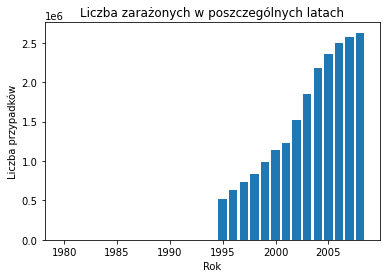

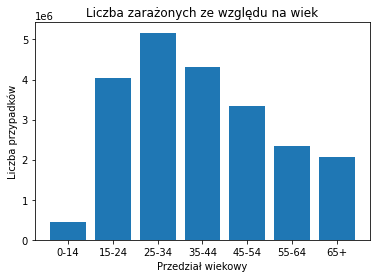

In [34]:
# Opracowanie i rysowanie wykresów

# Liczba zarażonych na rok
years = New_DF["Year"].unique()
years = sorted(years)
years_cases = []
for ea in years:
    years_cases.append(New_DF[New_DF["Year"]==ea].sum()['Cases'])

# Liczba zarażonych na wiek
age = New_DF["Age"].unique()
age = sorted(age)
age_cases = []
for ea in age:
    age_cases.append(New_DF[New_DF["Age"]==ea].sum()['Cases'])

# Rysowanie
plt.bar(years, years_cases)
plt.title('Liczba zarażonych w poszczególnych latach')
plt.ylabel('Liczba przypadków')
plt.xlabel('Rok')
plt.show()

plt.bar(age, age_cases)
plt.title('Liczba zarażonych ze względu na wiek')
plt.ylabel('Liczba przypadków')
plt.xlabel('Przedział wiekowy')
plt.show()

In [35]:
# Zapisywanie zmodyfikowanych danych do pliku "new_data.csv"
New_DF.to_csv(r'C:\Users\Karol\Desktop\Nauka\V Semestr\Analiza i Bazy Danych\AiBD_Karol_Musial\LAB 2\TIER Protocol Documentations\Analysis Data\new_data.csv')